In [2288]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB

In [2289]:
# Amazon Raw Data
data_path = ("https://raw.githubusercontent.com/borja876/Thinkful-DataScience-Borja/master/amazon_cells_labelled.txt"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['Sentence', 'Sentiment']
#sms_raw.head(30)  
sms_raw.loc[sms_raw['Sentiment'] == 1].head()

,Sentence,Sentiment
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
4,The mic is great.,1
7,If you are Razr owner...you must have this!,1
10,And the sound quality is great.,1


In [2290]:
# How many rows the dataset
sms_raw['Sentiment'].value_counts()

1    500
0    500
Name: Sentiment, dtype: int64

In [2291]:
keywords = ['wanted','important','sturdiness','encourage','happier','comfort','excited',
            'flawlessly','pleased','outperform','stars','adorable',
            'crisp','increase','better','thumbs','price','very',
            'significantly','strong','perfectly','surprised','amazed','sturdy',
            'securely','right','joy','finally','satisfied','better',
            'pretty','easy','10','easier','fulfills','ideal','beautiful','best','works','comfortable'
            ,'comfortably','charm','incredible', 'extra','quality','incredibly'
            ,'super','well','nice', 'clear','finished','well','more',
            'ideal','recommend','good','happy','like', 'excellent', 'awesome','cool',
            'fantastic','ok','love','reasonable','fine','great','impressed']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.Sentence.str.contains(
        ' '+str(key)+' ',
        case=False
    )

To select the features, I have tried the "positive" words that appear through the positive reviews.
When adding a word I was checking the success rate of the model so that It was increasing while checking that there correlation was low in the heatmap. Those words that were not increasing success have been discarded and those words which had a high correlation were also discarded, i.e. "Good" and "good". 

In [2292]:
sms_raw['allcaps'] = sms_raw.Sentence.str.isupper()

In [2293]:
sms_raw['Sentiment'] = (sms_raw['Sentiment'] == 1)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

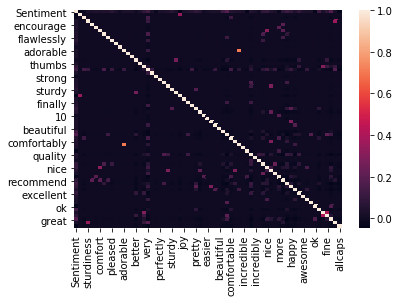

In [2294]:
sns.heatmap(sms_raw.corr())

In [2295]:
data = sms_raw[keywords+ ['allcaps']]
target = sms_raw['Sentiment']

In [2296]:
# Initantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

print("Success rate of our model out of {} : {}".format(
    data.shape[0],
    1-((target != y_pred).sum()/((target != y_pred).sum()+(target == y_pred).sum()))
))

Number of mislabeled points out of a total 1000 points : 296
Success rate of our model out of 1000 : 0.704


In [2297]:
# Yelp data.
data_path = ("https://raw.githubusercontent.com/borja876/Thinkful-DataScience-Borja/master/yelp_labelled.txt"
            )
sms_raw2 = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw2.columns = ['Sentence', 'Sentiment']
sms_raw2.loc[sms_raw2['Sentiment'] == 1].head()

,Sentence,Sentiment
0,Wow... Loved this place.,1
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
8,The fries were great too.,1
9,A great touch.,1


In [2298]:
# How many rows the dataset
sms_raw2['Sentiment'].value_counts()

1    500
0    500
Name: Sentiment, dtype: int64

In [2299]:
keywords = ['wanted','important','sturdiness','encourage','happier','comfort','excited',
            'flawlessly','pleased','outperform','stars','adorable',
            'crisp','increase','better','thumbs','price','very',
            'significantly','strong','perfectly','surprised','amazed','sturdy',
            'securely','right','joy','finally','satisfied','better',
            'pretty','easy','10','easier','fulfills','ideal','beautiful','best','works','comfortable'
            ,'comfortably','charm','incredible', 'extra','quality','incredibly'
            ,'super','well','nice', 'clear',
            'ideal','recommend','good','happy','like', 'excellent', 'awesome','cool',
            'fantastic','ok','love','reasonable','fine','great','impressed']


for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw2[str(key)] = sms_raw2.Sentence.str.contains(
        ' '+str(key)+' ',
        case=False
    )

In [2300]:
sms_raw2['allcaps'] = sms_raw2.Sentence.str.isupper()

In [2301]:
sms_raw2['Sentiment'] = (sms_raw2['Sentiment'] == 1)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

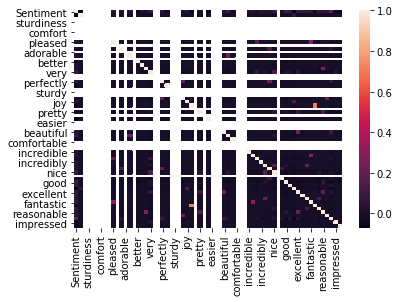

In [2302]:
sns.heatmap(sms_raw2.corr())

In [2303]:
data2 = sms_raw2[keywords+ ['allcaps']]
target2 = sms_raw2['Sentiment']

In [2304]:
# Initantiate our model and store it in a new variable.
bnb2 = BernoulliNB()

# Fit our model to the data.
bnb2.fit(data2, target2)

# Classify, storing the result in a new variable.
y_pred = bnb2.predict(data2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target2 != y_pred).sum()
))

print("Success rate of our model out of {} : {}".format(
    data2.shape[0],
    1-((target2 != y_pred).sum()/((target2 != y_pred).sum()+(target2 == y_pred).sum()))
))

Number of mislabeled points out of a total 1000 points : 349
Success rate of our model out of 1000 : 0.651


In [2305]:
# IMBD data.
data_path = ("https://raw.githubusercontent.com/borja876/Thinkful-DataScience-Borja/master/imdb_labelled.txt"
            )
sms_raw3 = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw3.columns = ['Sentence', 'Sentiment']
sms_raw3.loc[sms_raw3['Sentiment'] == 1].head()

,Sentence,Sentiment
4,The best scene in the movie was when Gerardo i...,1
7,Saw the movie today and thought it was a good ...,1
9,Loved the casting of Jimmy Buffet as the scien...,1
10,And those baby owls were adorable.,1
11,The movie showed a lot of Florida at it's best...,1


In [2306]:
# How many rows the dataset
sms_raw3['Sentiment'].value_counts()

1    386
0    362
Name: Sentiment, dtype: int64

In [2307]:
keywords = ['wanted','important','sturdiness','encourage','happier','comfort','excited',
            'flawlessly','pleased','outperform','stars','adorable',
            'crisp','increase','better','thumbs','price','very',
            'significantly','strong','perfectly','surprised','amazed','sturdy',
            'securely','right','joy','finally','satisfied','better',
            'pretty','easy','10','easier','fulfills','ideal','beautiful','best','works','comfortable'
            ,'comfortably','charm','incredible', 'extra','quality','incredibly'
            ,'super','well','nice', 'clear',
            'ideal','recommend','good','happy','like', 'excellent', 'awesome','cool',
            'fantastic','ok','love','reasonable','fine','great','impressed']


for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw3[str(key)] = sms_raw3.Sentence.str.contains(
        ' '+str(key)+' ',
        case=False
    )

In [2308]:
sms_raw3['allcaps'] = sms_raw3.Sentence.str.isupper()

In [2309]:
sms_raw3['Sentiment'] = (sms_raw3['Sentiment'] == 1)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

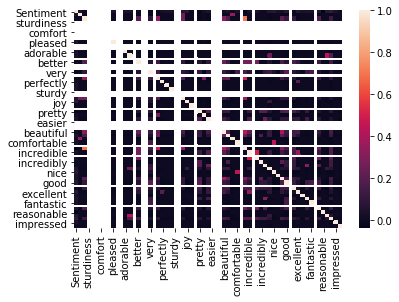

In [2310]:
sns.heatmap(sms_raw3.corr())

In [2311]:
data3 = sms_raw3[keywords+ ['allcaps']]
target3 = sms_raw3['Sentiment']

In [2312]:
# Initantiate our model and store it in a new variable.
bnb3 = BernoulliNB()

# Fit our model to the data.
bnb3.fit(data3, target3)

# Classify, storing the result in a new variable.
y_pred = bnb3.predict(data3)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data3.shape[0],
    (target3 != y_pred).sum()
))

print("Success rate of our model out of {} : {}".format(
    data3.shape[0],
    1-((target3 != y_pred).sum()/((target3 != y_pred).sum()+(target3 == y_pred).sum()))
))

Number of mislabeled points out of a total 748 points : 291
Success rate of our model out of 748 : 0.6109625668449198


What can be seen after adjusting the classifier using Amazon reviews is that once we change the context, the result dramatically change. In this case, when the classifier is used with reviews from Yelp, it decreases its success rate from 70% to 65% and to 61% when using IMBD.
There are words that appear in the Amazon reviews but that don´t appear in the reviews from Yelp or IMBD making the classifier less accurate. On the filpside, we are leaving keywords out that would improve the success rate of the classifier for the last two cases.